# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import graphviz



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [53]:
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
boston


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [55]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [57]:
boston = boston.drop(columns='b')

In [59]:
boston.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [61]:
boston.drop_duplicates()
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

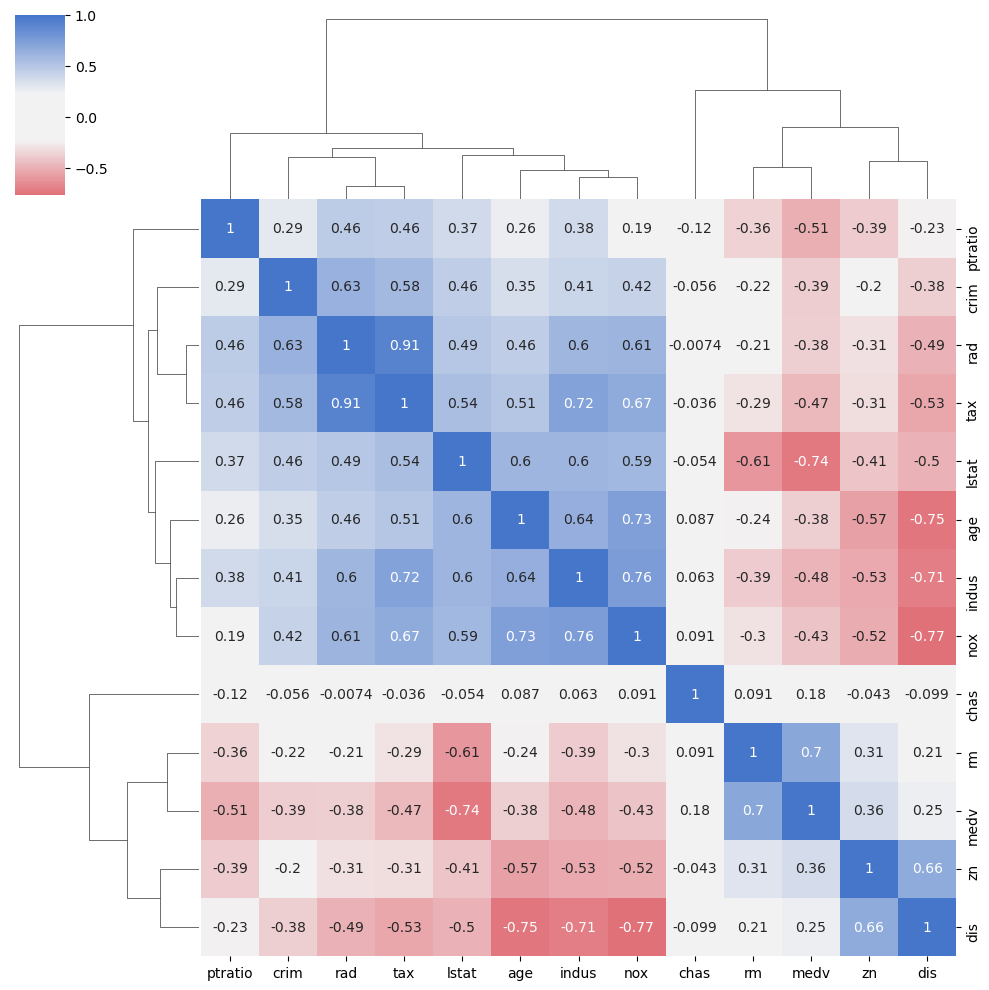

In [64]:
cmap = sns.diverging_palette(h_neg=10, h_pos=255, as_cmap=True, sep = 60, center = 'light')
sns. clustermap(boston.corr(), figsize=(10,10), center = 0, cmap=cmap, annot=True)

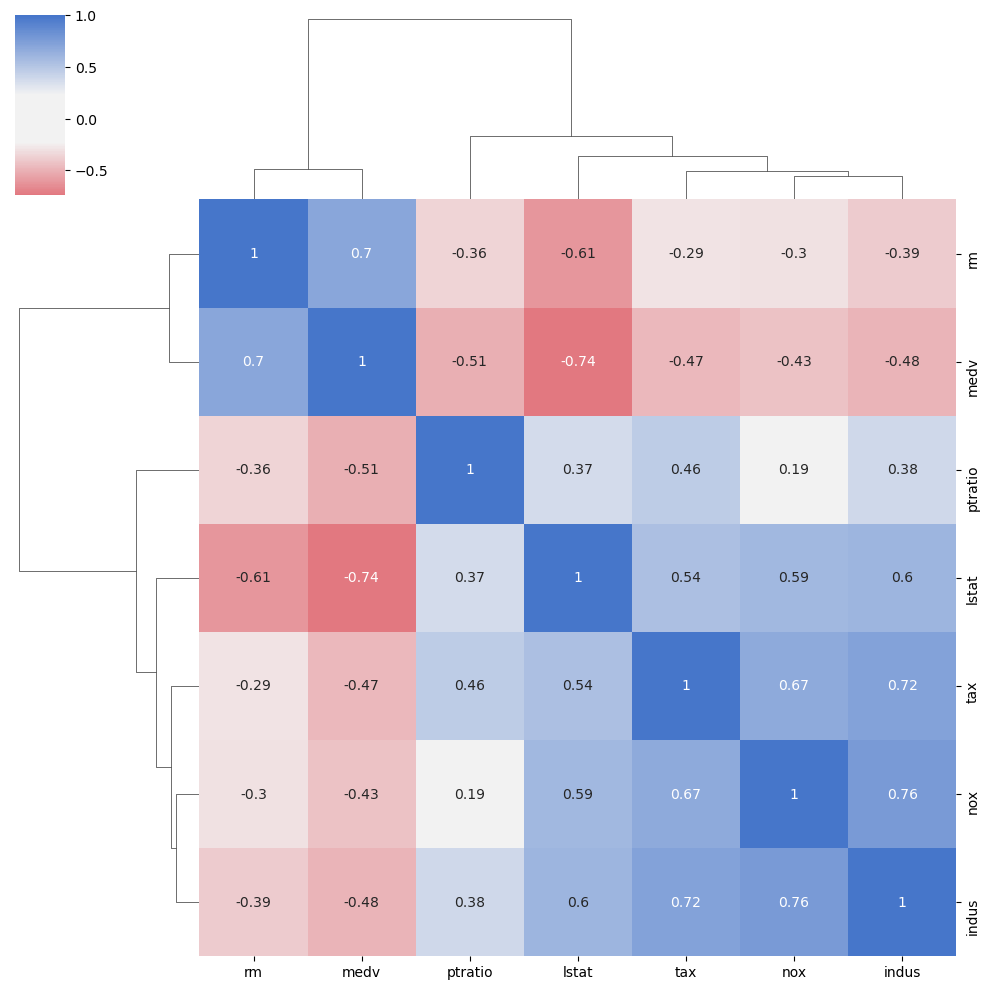

In [65]:

# Selecionar as colunas correlacionadas com a variavel target medv do DataFrame boston
colunas_correlacionadas = ['rm', 'nox', 'indus', 'lstat', 'tax', 'ptratio', 'medv']
boston_correlacoes = boston[colunas_correlacionadas]
correlacoes = boston_correlacoes.corr()

cmap = sns.diverging_palette(h_neg=10, h_pos=255, as_cmap=True, sep=60, center='light')
sns.clustermap(correlacoes, figsize=(10, 10), center=0, cmap=cmap, annot=True)

### Insights:
 - Coluna rm - Número médio de quartos tem correlação positiva forte com medv.
 - Coluna ptratio - Correlação negativa moderada com medv, significa que há menos alunos para cada professor.
 - Coluna lstat - Correlação negativa forte com medv, indicando a posição econômica mais baixa que algumas pessoas ocupam.
 - Coluna tax - Correlação negativa mediana, indicando que casas com valor mais baixo tendem a ter taxas mais baixas.
 - Coluna nox - Correlação negativa mediana entre medv e a concentração de óxido de nitrogênio.
 - Coluna indus - Correlação negativa mediana entre medv e a proporção de negócios não varejistas.

### 3. Separe os dados em validação e teste

In [70]:
x = boston_correlacoes.drop(columns=['medv'])
x.head()

,rm,nox,indus,lstat,tax,ptratio
0,6.575,0.538,2.31,4.98,296,15.3
1,6.421,0.469,7.07,9.14,242,17.8
2,7.185,0.469,7.07,4.03,242,17.8
3,6.998,0.458,2.18,2.94,222,18.7
4,7.147,0.458,2.18,5.33,222,18.7


In [72]:
y = boston_correlacoes['medv']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [77]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [80]:
arvore_treino2 = mean_squared_error(y_train, regr_1.predict(x_train))
arvore_teste2 = mean_squared_error(y_test, regr_1.predict(x_test))
arvore_treino8 = mean_squared_error(y_train, regr_2.predict(x_train))
arvore_teste8 = mean_squared_error(y_test, regr_2.predict(x_test))

print(f'O MSE na base de treino da arvore com profundidade 2 é: {arvore_treino2:.2f}')
print(f'O MSE na base de teste da arvore com profundidade 2 é: {arvore_teste2:.2f}')
print(f'O MSE na base de treino da arvore com profundidade 8 é: {arvore_treino8:.2f}')
print(f'O MSE na base de teste da arvore com profundidade 8 é: {arvore_teste8:.2f}')

O MSE na base de treino da arvore com profundidade 2 é: 25.12
O MSE na base de teste da arvore com profundidade 2 é: 30.43
O MSE na base de treino da arvore com profundidade 8 é: 2.36
O MSE na base de teste da arvore com profundidade 8 é: 20.59


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Quanto menor o valor do MSE, melhor. Ou seja, a árvore de decisão com profundidade 8 tem um MSE mais baixo tanto nos dados de treinamento quanto nos dados de teste, o que indica que ela está fazendo previsões mais precisas.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?